In [ ]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

# Область работы 1 (библиотеки)

In [ ]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics
import scipy.stats as stats
from scipy.stats import iqr
import sklearn


from sklearn.neighbors import  KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, ElasticNet, Ridge

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import validation_curve, train_test_split

from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.compose import make_column_transformer,ColumnTransformer,TransformedTargetRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures,KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler,Normalizer, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, QuantileTransformer, PowerTransformer

from sklearn.preprocessing import KBinsDiscretizer
import category_encoders as ce


In [ ]:
#pip install --upgrade category_encoders

In [2]:
import category_encoders as ce
from category_encoders import TargetEncoder


In [3]:
def histmaker_for_numeric_df(df):
    """рисует хистплоты для каждого столбца датафрейма. 
    Если в дф-е есть столбцы, которые не нужно рисовать, их стоит удалить """
    #оставим только численные столбцы 
    cond = [np.issubdtype(df[f'{column}'], np.number) for column in df.columns]
    df = df[df.columns[cond]]
    
    sns.set(style='darkgrid', palette='deep')

    array_of_columns_of_df = df.values.T.tolist()

    num_plots = len(df.columns)         #количество графиков
    num_rows = (num_plots - 1) // 3 + 1 #количество строк 
    num_cols = min(num_plots, 3)        #количество столбцов

    fig, axes = plt.subplots(num_rows, num_cols, figsize = (15, 4*num_rows))
    plt.suptitle('Histograms of every column in your df', fontsize = 15)
    for i, ax in enumerate(axes.flat):
        col = (np.random.random (), np.random.random (), np.random.random ()) #случайный увет
        if i < num_plots:
            ax.hist(array_of_columns_of_df[i],
                    bins = 50,
                    edgecolor = 'black', color = col, alpha = 0.7)
            ax.set_title(df.columns[i], weight='bold')
        if i % 3 == 0:
            ax.set_ylabel('count')
    
    #Удаление пустых подграфиков
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

In [4]:
sns.set_theme(style="whitegrid", palette="pastel")

# Область работы 2 (поиск  модели .... )

In [5]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' 
df_raw = pd.read_csv(path_train)
print(df_raw.shape)
df_raw

(67598, 12)


,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.50,K,SI2,Excellent,Excellent,Excellent,61.4,55.0,5.10,5.12,3.14,990
1,0.50,E,VVS2,Excellent,Excellent,Very Good,61.9,60.0,5.06,5.09,3.14,3384
2,0.35,G,VS2,Excellent,Excellent,Excellent,63.0,55.0,4.47,4.51,2.83,1154
3,0.30,E,SI2,Excellent,Excellent,Excellent,63.2,57.0,4.24,4.27,2.69,886
4,0.30,F,VS2,Very Good,Very Good,Excellent,63.4,61.0,4.24,4.26,2.69,864
...,...,...,...,...,...,...,...,...,...,...,...,...
67593,0.30,D,SI2,Very Good,Very Good,Excellent,64.4,55.0,4.19,4.21,2.71,640
67594,0.60,H,VS2,Excellent,Excellent,Excellent,62.4,59.0,5.40,5.42,3.38,2932
67595,0.36,L,VVS2,Excellent,Excellent,Excellent,62.3,55.0,4.55,4.59,2.85,788
67596,0.41,J,SI1,Excellent,Excellent,Excellent,62.7,57.0,4.74,4.78,2.98,1074


In [6]:
ind_nan = df_raw[df_raw.eq(0).any(axis=1)].index
df_raw[df_raw.eq(0).any(axis=1)]

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
18663,0.50,G,SI1,Very Good,Very Good,Excellent,62.7,0.0,4.99,5.04,3.15,1882
26083,0.80,L,VS1,Excellent,Excellent,Excellent,62.4,57.0,5.90,5.94,0.00,2724
32273,0.87,H,VS2,Excellent,Excellent,Excellent,62.5,56.0,6.12,6.14,0.00,6305
34446,0.70,G,SI2,Excellent,Excellent,Excellent,63.0,55.0,5.63,5.66,0.00,3276
54561,0.90,F,SI2,Excellent,Excellent,Excellent,62.4,57.0,6.13,6.17,0.00,6280


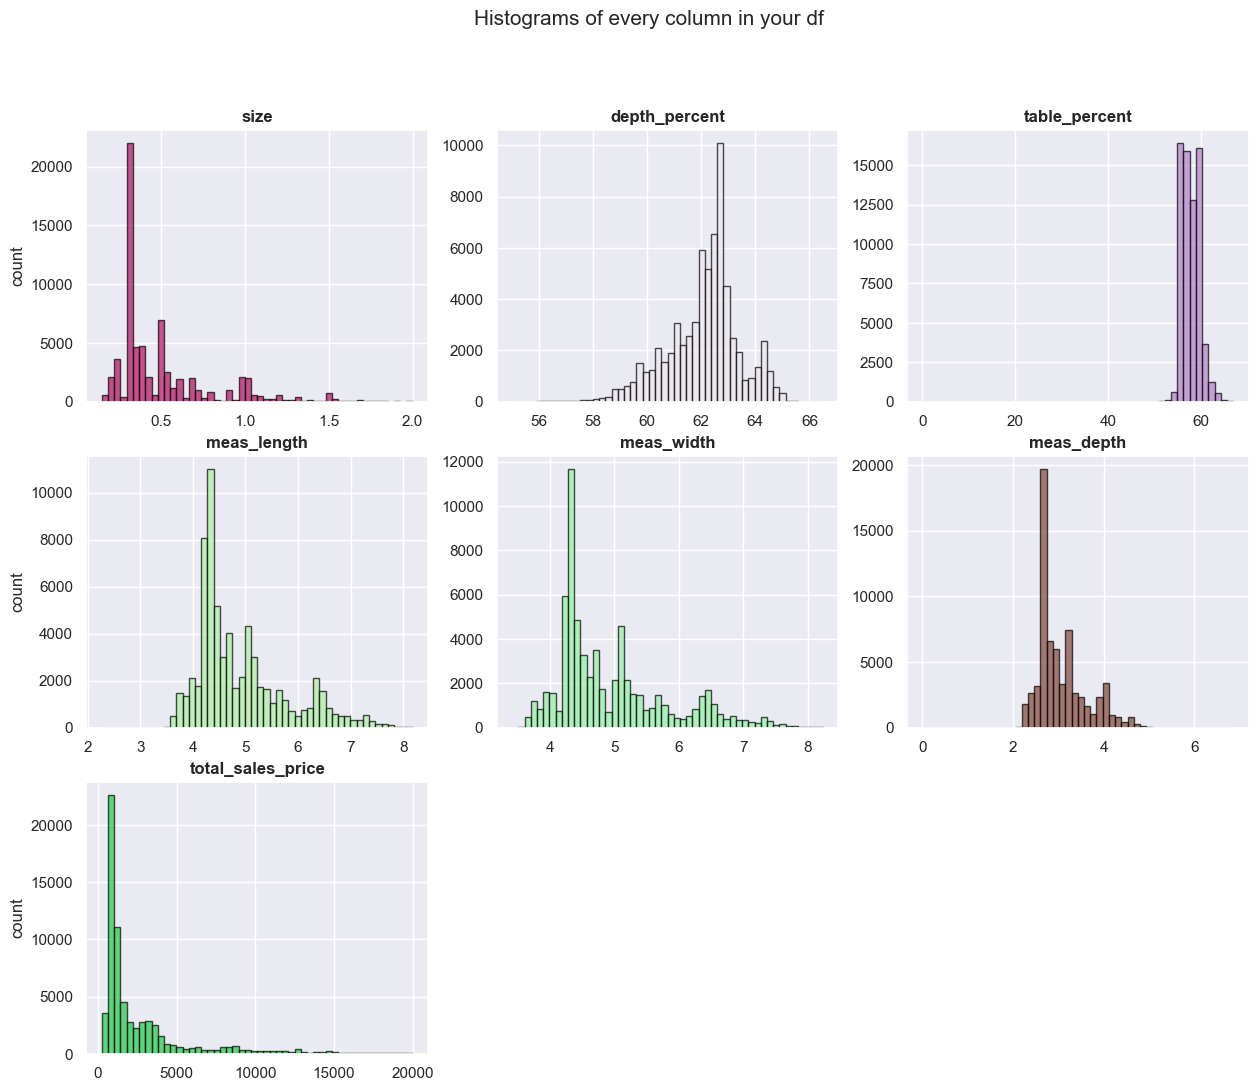

In [7]:
histmaker_for_numeric_df(df_raw)

### *Предобработка данных*

In [8]:
# разделим категориальные и численные столбцы на разные переменные
cat_features = ['color','clarity','cut','symmetry','polish']
axis_features = ['meas_length','meas_width','meas_depth']
nonaxis_num_features = ['size','depth_percent','table_percent']

num_features = ['size','depth_percent','table_percent','meas_length','meas_width','meas_depth']


------------------------------------------------Есть выбросы - уберем их (сравним два метода)------------------------------------------------

In [9]:
df_num = df_raw[num_features].copy()
df_num.shape

(67598, 6)

In [10]:
#попробуем убрать по правилу 3 сигм
z = np.abs(stats.zscore(df_num))
cleaned_df = df_num[(z<3).all(axis=1)].copy()
df_num.where((z<3).all(axis=1))
cleaned_df.shape

(65551, 6)

In [11]:
# совместим обработанный дф с нечисленными столцами
mask = [True if index in cleaned_df.index else False for index in df_raw.index]
df_3std = df_raw[mask].copy()
print(df_3std.shape)

(65551, 12)


In [12]:
#попробуем iqr
df_num = df_raw[num_features].copy()
df_num.shape

(67598, 6)

In [13]:
df_num = df_raw[num_features].copy()

#найдем квантили
Q1 = df_num.quantile(q=.25)
Q3 = df_num.quantile(q=.75)
IQR = df_num.apply(stats.iqr)


In [14]:

#оставим только попадающие в iqr
df_iqr = df_num[~((df_num < (Q1-1.5*IQR)) | (df_num > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df_iqr.shape


(56987, 6)

In [15]:
mask = [True if index in df_iqr.index else False for index in df_raw.index]
df_iqred = df_raw[mask].copy()
print(df_iqred.shape)

(56987, 12)


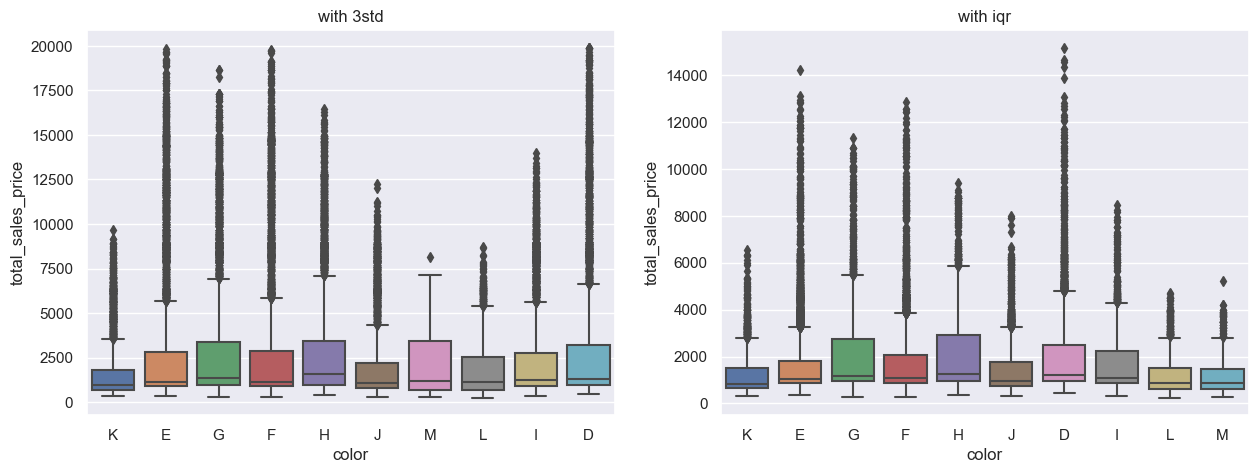

In [16]:
figure, ax = plt.subplots(1, 2, figsize = (15,5))
ax[0].set_title('with 3std');
ax[1].set_title('with iqr');
sns.boxplot(data=df_3std, x = 'color', y = 'total_sales_price', ax = ax[0]);
sns.boxplot(data=df_iqred, x = 'color', y = 'total_sales_price', ax = ax[1]);

как будто бы iqr работает лучше, оставим его. К тому же, распределение не симметрично относительно среднего и из-за этого отбор по 3м сигмам может быть плох

------------------------------------------------Уберем дубликаты------------------------------------------------

In [17]:
df_iqred.drop_duplicates(inplace=True)
df = df_iqred.copy()
print(df.shape)


(56838, 12)


------------------------------------------------Нулевые значения------------------------------------------------

In [18]:
# посмотрим на строки с пустыми нулевыми данными - аэээ они убрались во время обработки выборосов.
# все равно нужно будет обработать 0 значения, так как в тесте мы не можем убрать выбросы
df[df.eq(0).any(axis=1)]

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price


------------------------------------------------Корреляция------------------------------------------------

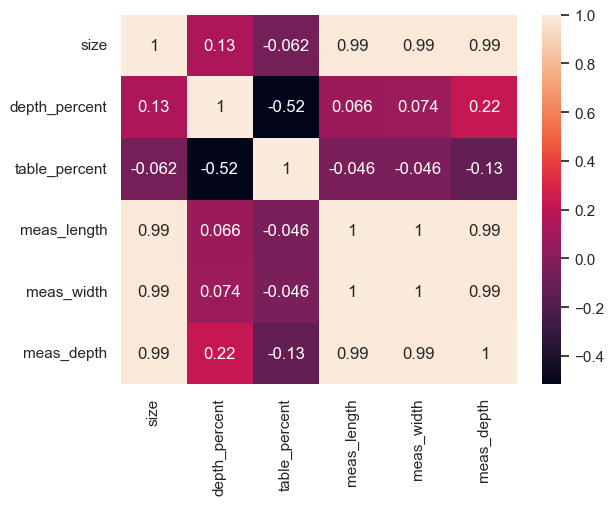

In [19]:
dataplot = sns.heatmap(df[num_features].corr(), annot = True)
# ого, size очень коррелирует с параметрами размеров (ого!)
# так как size посчитан по размерам и коррелирует, стоит дропнуть size

In [20]:
print(df.shape)
df.head()

(56838, 12)


,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.50,K,SI2,Excellent,Excellent,Excellent,61.4,55.0,5.10,5.12,3.14,990
1,0.50,E,VVS2,Excellent,Excellent,Very Good,61.9,60.0,5.06,5.09,3.14,3384
2,0.35,G,VS2,Excellent,Excellent,Excellent,63.0,55.0,4.47,4.51,2.83,1154
3,0.30,E,SI2,Excellent,Excellent,Excellent,63.2,57.0,4.24,4.27,2.69,886
4,0.30,F,VS2,Very Good,Very Good,Excellent,63.4,61.0,4.24,4.26,2.69,864


------------------------------------------------Проверим правильность depth_percent------------------------------------------------

в интернетах была найдена формула *depth percent* 
$$\frac{depth}{0.5(length + width)}* 100 $$

In [21]:
df_check = df.copy()

df_check['dp2'] = round(100 * df_check.meas_depth / (0.5*(df_check.meas_length + df_check.meas_width)),1)
df_check['pr_diff_d'] = (abs(df_check.depth_percent - df_check.dp2)/ df_check.dp2)*100

In [22]:
df_check[df_check['pr_diff_d'] > 15]

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price,dp2,pr_diff_d
9218,0.3,F,I1,Excellent,Excellent,Excellent,62.9,57.0,5.24,5.27,2.68,554,51.0,23.333333


в одном камне наврали с depth_percent, он отличается от настоящего depth_percent аж на 23%

------------------------------------------------Проверим правильность table_percent------------------------------------------------

в интернетах была найдена формула *table percent* 
$$\frac{width}{0.5(length + depth)}* 100 $$

In [23]:
# Расчет average_diameter
df_check['average_diameter'] = (df_check['meas_length'] + df_check['meas_width']) / 2

In [24]:
# Расчет table_percent
df_check['tp2'] = (df_check['meas_depth'] / df_check['average_diameter']) * 100

In [25]:
df_check['pr_diff_p'] = (abs(df_check.table_percent - df_check.tp2)/ df_check.tp2)*100

In [26]:
df_check[df_check['pr_diff_p'] > 15]

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price,dp2,pr_diff_d,average_diameter,tp2,pr_diff_p
198,0.50,G,SI1,Very Good,Very Good,Very Good,64.1,53.0,4.95,5.02,3.20,2426,64.2,0.155763,4.985,64.192578,17.435938
285,0.51,D,SI2,Very Good,Very Good,Very Good,63.7,54.0,5.04,5.06,3.22,2174,63.8,0.156740,5.050,63.762376,15.310559
746,0.30,G,SI2,Very Good,Very Good,Very Good,63.8,53.0,4.21,4.25,2.70,702,63.8,0.000000,4.230,63.829787,16.966667
1030,0.30,I,VVS2,Very Good,Very Good,Excellent,63.3,52.0,4.26,4.31,2.71,820,63.2,0.158228,4.285,63.243874,17.778598
1210,0.47,D,I1,Very Good,Very Good,Very Good,63.0,53.0,4.98,4.99,3.14,1410,63.0,0.000000,4.985,62.988967,15.858280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65871,0.30,I,SI2,Very Good,Very Good,Very Good,64.1,54.0,4.22,4.24,2.71,614,64.1,0.000000,4.230,64.066194,15.712177
66909,0.70,L,VVS2,Very Good,Excellent,Excellent,64.8,55.0,5.53,5.56,3.59,2118,64.7,0.154560,5.545,64.743012,15.048747
67156,0.90,E,VS2,Very Good,Very Good,Excellent,63.7,54.0,6.10,6.14,3.90,7478,63.7,0.000000,6.120,63.725490,15.261538
67471,0.30,E,VVS2,Very Good,Very Good,Excellent,63.5,53.0,4.23,4.25,2.69,1170,63.4,0.157729,4.240,63.443396,16.460967


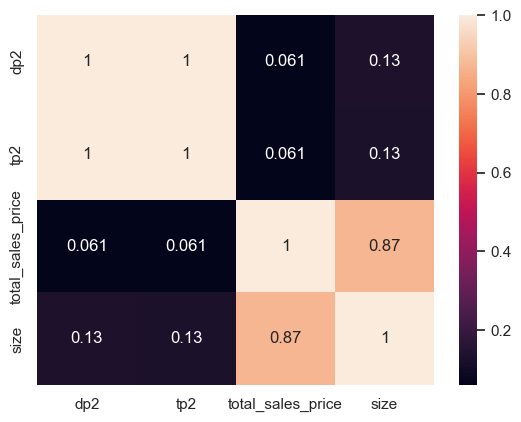

In [27]:
dataplot = sns.heatmap(df_check[['dp2','tp2','total_sales_price','size']].corr(), annot = True)

короче говоря, есть камни, у которых наврали в этих процентах, но выкидывать мы их не будем, так как они мало коррелируют с ценой. Скаттерплот так же говорит о том, что между ними нет даже нелинейной связи

------------------------------------------------Проверим правильность size------------------------------------------------

формула из интернетов: 
$$ 
size = Diameter^2 * depth * 0.0061
$$

In [28]:
df_check = df.copy()
df_check[df_check.meas_length > df_check.meas_width]
#вывело 0 строк, то есть у нас всегда meas_length будет меньше или равен meas_width. Берем meas_width за диаметр

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price


In [29]:
sz = (df_check['meas_width']**2)*df_check['meas_depth']*0.0061
df_check[((np.abs(sz / df_check['size'])) - 1) > 0.15]

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
3570,0.30,E,VVS2,Excellent,Excellent,Excellent,62.7,56.0,4.26,4.80,2.68,1132
5798,0.30,D,SI1,Very Good,Very Good,Excellent,64.1,57.0,4.21,4.71,2.69,846
9218,0.30,F,I1,Excellent,Excellent,Excellent,62.9,57.0,5.24,5.27,2.68,554
29932,0.71,H,SI2,Very Good,Excellent,Very Good,63.5,58.0,5.60,6.62,3.56,3968
47036,0.65,D,VVS2,Excellent,Excellent,Excellent,62.7,59.0,5.51,6.46,3.44,4357


In [30]:
df[df.eq(0).any(axis=1)]

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price


In [31]:
df

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.50,K,SI2,Excellent,Excellent,Excellent,61.4,55.0,5.10,5.12,3.14,990
1,0.50,E,VVS2,Excellent,Excellent,Very Good,61.9,60.0,5.06,5.09,3.14,3384
2,0.35,G,VS2,Excellent,Excellent,Excellent,63.0,55.0,4.47,4.51,2.83,1154
3,0.30,E,SI2,Excellent,Excellent,Excellent,63.2,57.0,4.24,4.27,2.69,886
4,0.30,F,VS2,Very Good,Very Good,Excellent,63.4,61.0,4.24,4.26,2.69,864
...,...,...,...,...,...,...,...,...,...,...,...,...
67593,0.30,D,SI2,Very Good,Very Good,Excellent,64.4,55.0,4.19,4.21,2.71,640
67594,0.60,H,VS2,Excellent,Excellent,Excellent,62.4,59.0,5.40,5.42,3.38,2932
67595,0.36,L,VVS2,Excellent,Excellent,Excellent,62.3,55.0,4.55,4.59,2.85,788
67596,0.41,J,SI1,Excellent,Excellent,Excellent,62.7,57.0,4.74,4.78,2.98,1074


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['total_sales_price']), df.total_sales_price,
                                                    test_size=0.3)

### *гридсерч ееееееееееее(1)*

In [34]:
def binarization(X):
    return np.where(X == 'Excellent', 1, 0)
def weird_gem(df):
    sz = (df['meas_width']**2)*df['meas_depth']*0.0061
    cond = ((abs(sz / df['size'])) - 1) > 0.15
    df.loc[cond, 'meas_length'] = 0
    #df.loc[cond, 'meas_width'] = 0
    #df.loc[cond, 'meas_depth'] = 0
    #print('weird gems nullified')
    return df

In [35]:
cat_features = ['cut', 'symmetry', 'polish', 'color', 'clarity']
axis_features = ['meas_length', 'meas_width', 'meas_depth', 'size']
num_features = ['depth_percent', 'table_percent']

In [36]:


axis_transformer = Pipeline(steps=[
    ('strange', FunctionTransformer(weird_gem, validate=False)),
    ('missing_num', IterativeImputer(missing_values=0, max_iter=10)),
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    ('scaler', StandardScaler())])

clarity_map = [{
    'col' : 'clarity',
    'mapping':{'FL':10,'IF':9, 'VVS1':8, 'VVS2':7,
               'VS1':6, 'VS2':5, 'SI1':4, 'SI2':3, 
               'I1':2, 'I2':1, 'I3':0}
}]

clarity_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])    
    
CT = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", num, num_features),
        ("cat", OneHotEncoder(sparse_output=False).set_output(transform="pandas"), cat_features),
        ("ordinal_map", clarity_transformer, ['clarity'])
        ]).set_output(transform='pandas')

display(CT)

ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head()



C:\Users\fueir\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:340: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('strange',
                                                  FunctionTransformer(func=<function weird_gem at 0x0000018D08B79BD0>)),
                                                 ('missing_num',
                                                  IterativeImputer(missing_values=0)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['meas_length', 'meas_width', 'meas_depth',
                                  'size']),
                                ('num',
                                 Pipeline(steps=...
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['cut', 'symmetry', 'polish', 'color',
                                  'clarity']),
                                ('ordinal_map',
                                 Pipeline(steps=[('missing_num',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': IF      9
VVS1    8
VVS2    7
VS1     6
VS2     5
SI1     4
SI2     3
I1      2
I2      1
I3      0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['clarity'])])

,axis_transformer__meas_length,axis_transformer__meas_width,axis_transformer__meas_depth,axis_transformer__size,axis_transformer__meas_length^2,axis_transformer__meas_length meas_width,axis_transformer__meas_length meas_depth,axis_transformer__meas_length size,axis_transformer__meas_width^2,axis_transformer__meas_width meas_depth,...,cat__clarity_I2,cat__clarity_I3,cat__clarity_IF,cat__clarity_SI1,cat__clarity_SI2,cat__clarity_VS1,cat__clarity_VS2,cat__clarity_VVS1,cat__clarity_VVS2,ordinal_map__clarity
55664,-0.482785,-0.479611,-0.455119,-0.546714,-0.504218,-0.502842,-0.493657,-0.544964,-0.501415,-0.492152,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667
12301,0.062547,0.080044,0.086095,-0.032742,0.003408,0.011830,0.015058,-0.091110,0.020230,0.023343,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.555556
56448,-1.518916,-1.544762,-1.480575,-1.253426,-1.376091,-1.386346,-1.365716,-1.125307,-1.396354,-1.375361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.888889
56175,-0.610029,-0.624039,-0.654513,-0.675207,-0.617827,-0.624098,-0.640368,-0.649744,-0.630282,-0.646340,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.555556
50971,-0.428252,-0.425451,-0.341179,-0.482468,-0.454969,-0.453746,-0.416779,-0.493153,-0.452481,-0.415457,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.555556


In [37]:
axis_transformer = Pipeline(steps = [
    ('strange', FunctionTransformer(weird_gem, validate=False)),
    #('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    ('missing_num', KNNImputer(missing_values=0, n_neighbors=3, weights="uniform")),
    ('binning', KBinsDiscretizer(encode='ordinal')),
    ('poly', PolynomialFeatures(2, include_bias=False)),
])

clarity_map = [{
    'col' : 'clarity',
    'mapping':{'IF':9, 'VVS1':8, 'VVS2':7,
               'VS1':6, 'VS2':5, 'SI1':4, 'SI2':3, 
               'I1':2, 'I2':1, 'I3':0}
}]

clarity_transformer = Pipeline(steps=[
    #('missing_num', KNNImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ]) 

num_transformer = Pipeline(steps = [
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    ('binning', KBinsDiscretizer(encode='ordinal')),
])

cat_transformer = Pipeline(steps = [
   ('encoder', OneHotEncoder(sparse_output=False)),
])


CT_bin = ColumnTransformer([
    ('axis', axis_transformer, axis_features),
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features),
    ('clarity',clarity_transformer, ['clarity'])
]).set_output(transform='pandas')

CT_bin

C:\Users\fueir\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:340: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


ColumnTransformer(transformers=[('axis',
                                 Pipeline(steps=[('strange',
                                                  FunctionTransformer(func=<function weird_gem at 0x0000018D08B79BD0>)),
                                                 ('missing_num',
                                                  KNNImputer(missing_values=0,
                                                             n_neighbors=3)),
                                                 ('binning',
                                                  KBinsDiscretizer(encode='ordinal')),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['meas_length', 'meas_width', 'meas_depth',
                                  'size']),
                                ('num',
                                 Pip...
                                 ['depth_percent', 'table_percent']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['cut', 'symmetry', 'polish', 'color',
                                  'clarity']),
                                ('clarity',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': IF      9
VVS1    8
VVS2    7
VS1     6
VS2     5
SI1     4
SI2     3
I1      2
I2      1
I3      0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['clarity'])])

In [38]:


model_target =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="normal")
)

model_target.fit(X_train, y_train)



TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('axis_transformer',
                                                                                       Pipeline(steps=[('strange',
                                                                                                        FunctionTransformer(func=<function weird_gem at 0x0000018D08B79BD0>)),
                                                                                                       ('missing_num',
                                                                                                        IterativeImputer(missing_values=0)),
                                                                                                       ('polynom',
                                                                                                        PolynomialFeatures(include_bias=False)),
                                                                                                       ('scaler',
                                                                                                        StandardScaler())]),
                                                                                       ['meas_l...
                                                                                      ('ordinal_map',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('ce',
                                                                                                        OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                                                 'data_type': dtype('O'),
                                                                                                                                 'mapping': IF      9
VVS1    8
VVS2    7
VS1     6
VS2     5
SI1     4
SI2     3
I1      2
I2      1
I3      0
dtype: int64}])),
                                                                                                       ('scaler',
                                                                                                        MinMaxScaler())]),
                                                                                       ['clarity'])])),
                                                     ('estimator', Ridge())]),
                           transformer=QuantileTransformer(output_distribution='normal'))

In [39]:

y_pred = model_target.predict(X_train)
y_pred_test = model_target.predict(X_test)
print(f'train MAPE: {mean_absolute_percentage_error(y_train, y_pred)}')
print(f'test MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}')

train MAPE: 0.10621274989737725
test MAPE: 0.10608888680639118


### *Эээээээээ два (вроде лучше)*

In [40]:
cat_features = ['cut', 'symmetry', 'polish', 'color', 'clarity']
axis_features = ['meas_length', 'meas_width', 'meas_depth', 'size']
num_features = ['depth_percent', 'table_percent']

In [41]:
def binarization(X):
    return np.where(X == 'Excellent', 1, 0)
def weird_gem(df):
    sz = (df['meas_width']**2)*df['meas_depth']*0.0061
    cond = ((abs(sz / df['size'])) - 1) > 0.15
    df.loc[cond, 'meas_length'] = 0
    #df.loc[cond, 'meas_width'] = 0
    #df.loc[cond, 'meas_depth'] = 0
    #print('weird gems nullified')
    return df

In [42]:

axis_transformer = Pipeline(steps=[
    ('strange', FunctionTransformer(weird_gem, validate=False)),
    #('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    ('missing_num', KNNImputer(missing_values=0, n_neighbors=3, weights="uniform")),
    #('bin', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')), с ним хуже..
    ('polynom', PolynomialFeatures(2, include_bias=False)),
    ('scaler', StandardScaler())])

num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    ('scaler', StandardScaler())])

clarity_map = [{
    'col' : 'clarity',
    'mapping':{'IF':9, 'VVS1':8, 'VVS2':7,
               'VS1':6, 'VS2':5, 'SI1':4, 'SI2':3, 
               'I1':2, 'I2':1, 'I3':0}
}]

clarity_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])    
    
CT = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", num, num_features),
        ("cat", OneHotEncoder(sparse_output=False).set_output(transform="pandas"), cat_features),
        ("ordinal_map", clarity_transformer, ['clarity'])
        ]).set_output(transform='pandas')

display(CT)

ct = CT.fit_transform(X_train)


C:\Users\fueir\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:340: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('strange',
                                                  FunctionTransformer(func=<function weird_gem at 0x0000018D09EE3E20>)),
                                                 ('missing_num',
                                                  KNNImputer(missing_values=0,
                                                             n_neighbors=3)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['meas_length', 'meas_width', 'meas_depth',
                                  'size']),
                                ('num',
                                 Pipelin...
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['cut', 'symmetry', 'polish', 'color',
                                  'clarity']),
                                ('ordinal_map',
                                 Pipeline(steps=[('missing_num',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': IF      9
VVS1    8
VVS2    7
VS1     6
VS2     5
SI1     4
SI2     3
I1      2
I2      1
I3      0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['clarity'])])

In [43]:
# ээээ тут было 0.0837 на тесте
model = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

param_grid = [
    {'model__regressor__estimator':[KNeighborsRegressor()],
     'model__regressor__estimator__n_neighbors': [4,11],
     'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer()],
     'model__transformer':[PowerTransformer(method = 'box-cox'),QuantileTransformer(n_quantiles=1000, output_distribution="normal")],
     'model__regressor__preproc__cat': [OneHotEncoder(sparse_output=False), TargetEncoder()]
    }
]

scores='neg_mean_absolute_percentage_error'
grid = GridSearchCV(model, n_jobs=1, param_grid=param_grid, scoring=scores)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('axis_transformer',
                                                                                                                               Pipeline(steps=[('strange',
                                                                                                                                                FunctionTransformer(func=<function weird_gem at 0x0000018D09EE3E20>)),
                                                                                                                                               ('missing_num',
                                                                                                                                                KNNImputer(missing_values=0,
                                                                                                                                                           n_neighbors=3)),
                                                                                                                                               ('polynom',
                                                                                                                                                Po...
                          'model__regressor__estimator__n_neighbors': [4, 11],
                          'model__regressor__preproc__cat': [OneHotEncoder(sparse_output=False),
                                                             TargetEncoder()],
                          'model__regressor__preproc__num__scaler': [StandardScaler(),
                                                                     RobustScaler(),
                                                                     MinMaxScaler(),
                                                                     Normalizer()],
                          'model__transformer': [PowerTransformer(method='box-cox'),
                                                 QuantileTransformer(output_distribution='normal')]}],
             scoring='neg_mean_absolute_percentage_error')

In [44]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,6,4,7,5,22,20,23,21,2,3,...,17,12,27,26,11,25,10,9,24,8
mean_fit_time,0.216117,0.204393,0.198103,0.185637,0.258794,0.23788,0.220413,0.216779,0.211313,0.190188,...,0.220624,0.408844,0.378214,0.44063,0.417828,0.40411,0.40735,0.35312,0.397131,0.386129
std_fit_time,0.009539,0.010112,0.007419,0.003842,0.008554,0.016532,0.020233,0.014645,0.004776,0.010482,...,0.007244,0.010632,0.007787,0.023939,0.022976,0.028231,0.037072,0.009878,0.016422,0.023617
mean_score_time,0.5689,0.482779,0.587038,0.504242,0.62117,0.539297,0.574344,0.608608,0.559031,0.513602,...,0.5496,0.407175,0.441514,0.495497,0.441364,0.480725,0.498286,0.417408,0.448472,0.413894
std_score_time,0.071585,0.0047,0.027181,0.011952,0.027902,0.028283,0.038516,0.08567,0.038824,0.035855,...,0.030631,0.009215,0.012856,0.041243,0.03575,0.042861,0.060901,0.0211,0.029189,0.01554
param_model__regressor__estimator,KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),...,KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4),KNeighborsRegressor(n_neighbors=4)
param_model__regressor__estimator__n_neighbors,4,4,4,4,11,11,11,11,4,4,...,11,4,11,11,4,11,4,4,11,4
param_model__regressor__preproc__cat,OneHotEncoder(sparse_output=False),OneHotEncoder(sparse_output=False),OneHotEncoder(sparse_output=False),OneHotEncoder(sparse_output=False),OneHotEncoder(sparse_output=False),OneHotEncoder(sparse_output=False),OneHotEncoder(sparse_output=False),OneHotEncoder(sparse_output=False),OneHotEncoder(sparse_output=False),OneHotEncoder(sparse_output=False),...,OneHotEncoder(sparse_output=False),TargetEncoder(),TargetEncoder(),TargetEncoder(),TargetEncoder(),TargetEncoder(),TargetEncoder(),TargetEncoder(),TargetEncoder(),TargetEncoder()
param_model__regressor__preproc__num__scaler,Normalizer(),MinMaxScaler(),Normalizer(),MinMaxScaler(),Normalizer(),MinMaxScaler(),Normalizer(),MinMaxScaler(),RobustScaler(),RobustScaler(),...,StandardScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),RobustScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler()
param_model__transformer,PowerTransformer(method='box-cox'),PowerTransformer(method='box-cox'),QuantileTransformer(output_distribution='normal'),QuantileTransformer(output_distribution='normal'),PowerTransformer(method='box-cox'),PowerTransformer(method='box-cox'),QuantileTransformer(output_distribution='normal'),QuantileTransformer(output_distribution='normal'),PowerTransformer(method='box-cox'),QuantileTransformer(output_distribution='normal'),...,QuantileTransformer(output_distribution='normal'),PowerTransformer(method='box-cox'),QuantileTransformer(output_distribution='normal'),PowerTransformer(method='box-cox'),QuantileTransformer(output_distribution='normal'),QuantileTransformer(output_distribution='normal'),PowerTransformer(method='box-cox'),QuantileTransformer(output_distribution='normal'),PowerTransformer(method='box-cox'),PowerTransformer(method='box-cox')
params,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,...,{'model__regresso

{'model__regressor__estimator': KNeighborsRegressor(n_neighbors=4),
 'model__regressor__estimator__n_neighbors': 4,
 'model__regressor__preproc__cat': OneHotEncoder(sparse_output=False),
 'model__regressor__preproc__num__scaler': Normalizer(),
 'model__transformer': PowerTransformer(method='box-cox')}

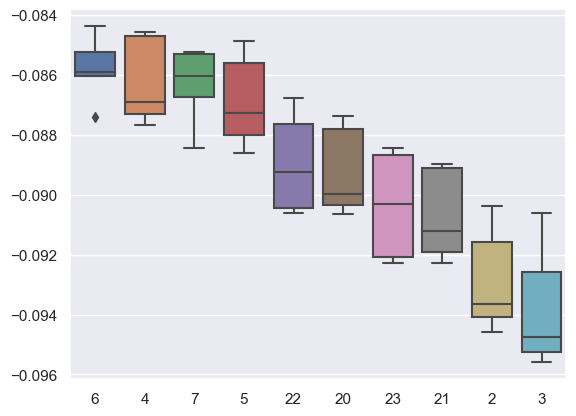

In [45]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

grid.best_params_

In [46]:
final = grid.best_estimator_
final.fit(X_train, y_train)

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('axis_transformer',
                                                                                                        Pipeline(steps=[('strange',
                                                                                                                         FunctionTransformer(func=<function weird_gem at 0x0000018D09EE3E20>)),
                                                                                                                        ('missing_num',
                                                                                                                         KNNImputer(missing_values=0,
                                                                                                                                    n_neighbors=3)),
                                                                                                                        ('polynom',
                                                                                                                         PolynomialFeatures(includ...
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         SimpleImputer(strategy='most_frequent')),
                                                                                                                        ('ce',
                                                                                                                         OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                                                                  'data_type': dtype('O'),
                                                                                                                                                  'mapping': IF      9
VVS1    8
VVS2    7
VS1     6
VS2     5
SI1     4
SI2     3
I1      2
I2      1
I3      0
dtype: int64}])),
                                                                                                                        ('scaler',
                                                                                                                         MinMaxScaler())]),
                                                                                                        ['clarity'])])),
                                                                      ('estimator',
                                                                       KNeighborsRegressor(n_neighbors=4))]),
                                            transformer=PowerTransformer(method='box-cox')))])

In [47]:
y_pred = final.predict(X_train)
y_pred_test = final.predict(X_test)
print(f'train MAPE: {mean_absolute_percentage_error(y_train, y_pred)}')
print(f'test MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}')

train MAPE: 0.06297984820608456
test MAPE: 0.08378658132047018


In [50]:
score = []
#устойчивость модели
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['total_sales_price']), df.total_sales_price, test_size=0.3)
    final.fit(X_train, y_train)
    y_pred_test = final.predict(X_test)
    score.append(mean_absolute_percentage_error(y_test, y_pred_test))
    


In [51]:
print('mean MAPE', np.array(score).mean())
print('std MAPE', np.array(score).std())
# пойдет

mean MAPE 0.08424102536077441
std MAPE 0.0006947719827076737


# пока что результат выше - лучший

### *Гридсерч по регрессиям* (уже третий или какой там..)

In [ ]:

axis_transformer = Pipeline(steps=[
    ('strange', FunctionTransformer(weird_gem, validate=False)),
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    #('bin', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')), с ним хуже..
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    ('scaler', StandardScaler())])

clarity_map = [{
    'col' : 'clarity',
    'mapping':{'IF':9, 'VVS1':8, 'VVS2':7,
               'VS1':6, 'VS2':5, 'SI1':4, 'SI2':3, 
               'I1':2, 'I2':1, 'I3':0}
}]

clarity_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])    
    
CT = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", num, num_features),
        ("cat", OneHotEncoder(sparse_output=False).set_output(transform="pandas"), cat_features),
        ("ordinal_map", clarity_transformer, ['clarity'])
        ]).set_output(transform='pandas')

display(CT)

ct = CT.fit_transform(X_train)


In [ ]:
model = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

param_grid = [
    {'model__regressor__estimator':[Ridge()],
     'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer()],
     'model__regressor__estimator__alpha': [0.2, 0.4, 0.6, 0.8, 1],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="uniform"), QuantileTransformer(n_quantiles=1000, output_distribution="normal")],
     'model__regressor__preproc__ordinal_map__ce':[ce.OrdinalEncoder(mapping=clarity_map), TargetEncoder()]
    },
    
    {'model__regressor__estimator':[Lasso()],
     'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer()],
     'model__regressor__estimator__alpha': [0.2, 0.4, 0.6, 0.8, 1],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="uniform"), QuantileTransformer(n_quantiles=1000, output_distribution="normal")],
     'model__regressor__preproc__ordinal_map__ce':[ce.OrdinalEncoder(mapping=clarity_map), TargetEncoder()]}
]


scores='neg_mean_absolute_percentage_error'
grid = GridSearchCV(model, n_jobs=1, param_grid=param_grid, scoring=scores)
grid.fit(X_train, y_train)

In [ ]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

In [ ]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl,  linewidth=1.5);

grid.best_params_

In [ ]:
final = grid.best_estimator_
final.fit(X_train, y_train)

In [ ]:
y_pred = final.predict(X_train)
y_pred_test = final.predict(X_test)
print(f'train MAPE: {mean_absolute_percentage_error(y_train, y_pred)}')
print(f'test MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}')

 чет регрессия вообще отстой))))))))0